In [ ]:
# from: https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np
import random
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


### Load MNIST data

In [64]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


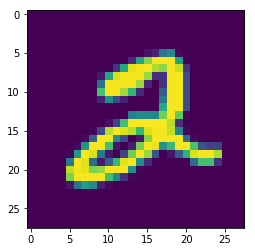

In [65]:
# Plotting first sample of X_trainPython

import matplotlib.pyplot as plt
image = X_train[5]
plt.imshow(image)
plt.show()

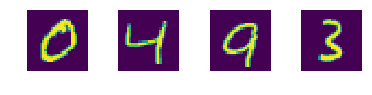

In [66]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
images_to_view = [1, 2, 3000, 50000]

# Fill out the subplots with the random images that you defined 
for i in range(len(images_to_view)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(X_train[images_to_view[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [67]:
print(images_to_view[i])
print(X_train[images_to_view[i]].size)
print(X_train[images_to_view[i]])

50000
784
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  47 160 195 205  71  86  13   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  12 238 254 254 254 254 254 227  84
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13 196 176 127 176 207 236 245 222
   23   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 137 254
   95   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 

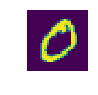

shape: (28, 28), min: 0, max: 255


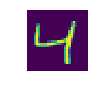

shape: (28, 28), min: 0, max: 255


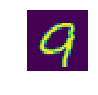

shape: (28, 28), min: 0, max: 255


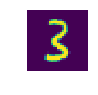

shape: (28, 28), min: 0, max: 255


In [68]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
images_to_view = [1, 2, 3000, 50000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(images_to_view)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(X_train[images_to_view[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(X_train[images_to_view[i]].shape, 
                                                  X_train[images_to_view[i]].min(), 
                                                  X_train[images_to_view[i]].max()))

In [69]:
# Reshape input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [70]:
print (X_train.shape)
# (60000, 1, 28, 28)

(60000, 1, 28, 28)


In [71]:
# Convert data type and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [72]:
print (y_train.shape)

(60000,)


In [73]:
print (y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]
# The y_train and y_test data are not split into 10 distinct class labels, 
# but rather are represented as a single array with the class values.

[5 0 4 1 9 2 1 3 1 4]


In [74]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [75]:
print (Y_train.shape)

(60000, 10)


In [76]:
model = Sequential()

# CNN input layer
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28), 
                        dim_ordering='th'))
# The input shape parameter should be the shape of 1 sample. In this case, 
# it's the same (1, 28, 28) that corresponds to  the (depth, width, height) 
# of each digit image.

# But what do the first 3 parameters represent? They correspond to the number 
# of convolution filters to use, the number of rows in each convolution kernel,
# and the number of columns in each convolution kernel, respectively.

# DELETE LATER
# model.add(Dense(32, 
#                 activation='relu',
#                 input_dim=100))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])

C:\Users\Stebbins\Anaconda3_64\envs\py35\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., activation="relu", data_format="channels_first")`
  """


In [77]:
print (model.output_shape)
# (None, 32, 26, 26)

(None, 32, 26, 26)


In [78]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\Stebbins\Anaconda3_64\envs\py35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [79]:
# Fully connected dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [80]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [81]:
# Fit Keras model
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\Users\Stebbins\Anaconda3_64\envs\py35\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 122s - loss: 0.2661 - acc: 0.9194   
Epoch 2/10
60000/60000 [==============================] - 121s - loss: 0.1100 - acc: 0.9678   
Epoch 3/10
60000/60000 [==============================] - 122s - loss: 0.0851 - acc: 0.9747   
Epoch 4/10
60000/60000 [==============================] - 119s - loss: 0.0699 - acc: 0.9794   
Epoch 5/10
60000/60000 [==============================] - 118s - loss: 0.0591 - acc: 0.9824   
Epoch 6/10
60000/60000 [==============================] - 119s - loss: 0.0542 - acc: 0.9834   
Epoch 7/10
60000/60000 [==============================] - 119s - loss: 0.0463 - acc: 0.9851   
Epoch 8/10
60000/60000 [==============================] - 120s - loss: 0.0433 - acc: 0.9863   
Epoch 9/10
60000/60000 [==============================] - 127s - loss: 0.0396 - acc: 0.9870   
Epoch 10/10
60000/60000 [==============================] - 127s - loss: 0.0348 - acc: 0.9888   


In [82]:
from keras.models import load_model
model.save('model_file.h5')

In [98]:
# Pick 10 random images
sample_indexes = random.sample(range(len(X_test)), 10)
sample_images = [X_test[i] for i in sample_indexes]
sample_labels = [y_test[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = model.predict(X_test,batch_size=32)

In [99]:
## Print the real and predicted labels
# print(predicted[sample_indexes[0]])
# print(np.argmax(predicted[sample_indexes[0]]))
# print(sample_labels[0])
# print("------------")

predicted_label = []
for i in range (0, len(sample_indexes)):
    predicted_label.append(np.argmax(predicted[sample_indexes[i]]))
#     print("truth = ", sample_labels[i], "  prediction = ", np.argmax(predicted[sample_indexes[i]]))
print(sample_labels)
print(predicted_label)


[  1.31481211e-13   9.99999642e-01   7.85790377e-10   3.83205143e-12
   3.10364101e-07   8.39351089e-10   3.18311000e-09   5.55143949e-08
   1.52217183e-09   2.94754732e-09]
1
1
------------
[1, 2, 4, 9, 6, 2, 9, 8, 7, 4]
[1, 2, 4, 9, 6, 2, 9, 8, 7, 4]


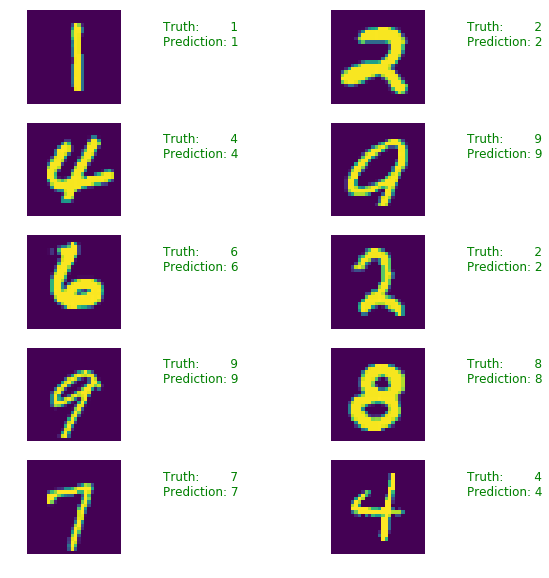

In [101]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted_label[i]
    image = X_test[sample_indexes[i]]
    image = np.squeeze(image)
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(image)
plt.show()

In [102]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

 9952/10000 [============================>.] - ETA: 0s[0.031410094986410696, 0.98960000000000004]
